In [43]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [44]:
df= pd.read_csv('titanic_train.csv')

In [45]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [46]:
df.shape

(850, 15)

In [47]:
df.set_index('passenger_id', inplace= True)

In [48]:
df.isna().sum()

pclass         0
name           0
sex            0
age          174
sibsp          0
parch          0
ticket         0
fare           1
cabin        659
embarked       1
boat         542
body         777
home.dest    386
survived       0
dtype: int64

In [49]:
#handling missing values
df.drop(['cabin','boat','body','home.dest'],axis=1,inplace= True)

In [50]:
df['age']=df['age'].fillna(df['age'].mean())

In [51]:
df['embarked']= df['embarked'].fillna(df['embarked'].mode()[0])

In [52]:
df['fare']= df['fare'].fillna(df['fare'].mean())

In [53]:
df.isna().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64

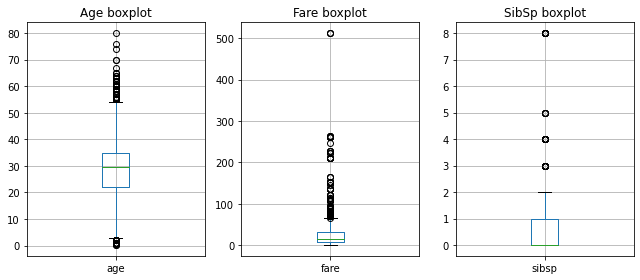

In [54]:
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='sibsp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

In [55]:
outliers_list=['age','fare','sibsp']
for i in outliers_list:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    l_lim=Q1-1.5*IQR
    u_lim=Q3+1.5*IQR
    df[i].where(df[i] >=l_lim,l_lim, inplace=True)  #replacing all lower outliers with lower limit
    df[i].where(df[i] <=u_lim,u_lim, inplace=True) 

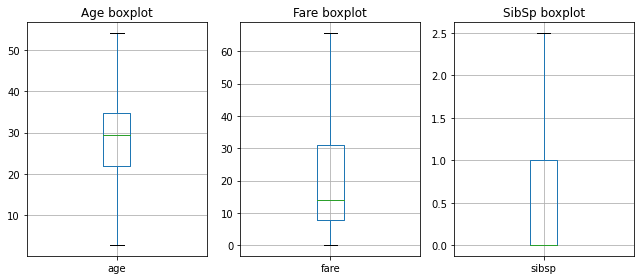

In [56]:
plt.figure(figsize=(9,4))
plt.subplot(1,3,1)
df.boxplot(column='age')
plt.title('Age boxplot',fontsize=12)
plt.subplot(1,3,2)
df.boxplot(column='fare')
plt.title('Fare boxplot',fontsize=12)
plt.subplot(1,3,3)
df.boxplot(column='sibsp')
plt.title('SibSp boxplot',fontsize=12)
plt.tight_layout()

<AxesSubplot:>

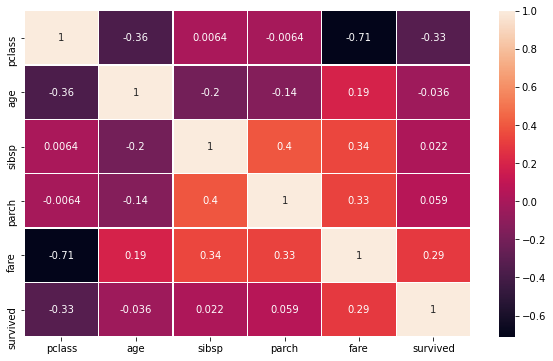

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(),annot=True,linewidth=0.2)

In [59]:
X=df.drop('survived',axis=1)
X.columns

Index(['pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'embarked'],
      dtype='object')

In [60]:
y=df['survived']

In [61]:
X=pd.get_dummies(X) 
X.head()

,pclass,age,sibsp,parch,fare,"name_Abbing, Mr. Anthony","name_Abbott, Master. Eugene Joseph","name_Abbott, Mr. Rossmore Edward","name_Abbott, Mrs. Stanton (Rosa Hunt)","name_Abelseth, Miss. Karen Marie",...,ticket_W./C. 14266,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735,embarked_C,embarked_Q,embarked_S
passenger_id,,,,,,,,,,,,,,,,,,,,,
1216,3,29.519847,0.0,0,7.7333,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
699,3,38.000000,0.0,0,8.6625,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1267,3,30.000000,1.0,1,24.1500,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
449,2,54.000000,1.0,3,23.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
576,2,40.000000,0.0,0,13.0000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.3)

In [63]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler(feature_range=(0,1))
X_train = min_max.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_test = min_max.transform(X_test)
X_test = pd.DataFrame(X_test)

In [64]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score,  f1_score
def get_confusion_matrix(y_test,prediction):
    conf_matrix = confusion_matrix(y_test,prediction)
    return conf_matrix
def get_accuracy_score(y_test,prediction):
    accuracy = accuracy_score(y_test,prediction)
    return accuracy
def get_f1_score(y_test,prediction):
    f1 = f1_score(y_test,prediction)
    return f1

In [65]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[ 31 126]
 [  5  93]]
Accuracy : 0.48627450980392156
F1-score : 0.5867507886435331


In [66]:
bnb=BernoulliNB()
bnb.fit(X_train, y_train)
prediction = bnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[148   9]
 [ 55  43]]
Accuracy : 0.7490196078431373
F1-score : 0.5733333333333333


In [67]:
mnb=MultinomialNB()
mnb.fit(X_train, y_train)
prediction = mnb.predict(X_test)
print('Confusion matrix :',get_confusion_matrix(y_test, prediction))
print('Accuracy :',get_accuracy_score(y_test, prediction))
print('F1-score :',get_f1_score(y_test, prediction))

Confusion matrix : [[146  11]
 [ 44  54]]
Accuracy : 0.7843137254901961
F1-score : 0.6625766871165644
